In [1]:
import pickle
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [16]:
dic = {}
with open('dict.pickle', 'rb') as file:
    dic = pickle.load(file)

In [17]:
import pandas as pd

In [18]:
for key in dic:
    dic[key] = dic[key][0]

In [19]:
df = pd.DataFrame.from_dict(dic, orient='index', columns=['var_{}'.format(i) for i in range(1, 512 + 1)])

In [20]:
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_503,var_504,var_505,var_506,var_507,var_508,var_509,var_510,var_511,var_512
1000,0.588805,0.367016,0.344345,1.283681,0.320430,0.331116,0.350267,0.451208,1.205313,0.299946,...,0.336634,0.224746,0.361000,1.259031,0.881397,0.523854,0.468960,0.509263,0.392395,0.568531
1001,0.416781,0.673969,0.388573,1.139235,0.429930,0.391822,0.388822,0.562645,1.054589,0.385249,...,0.380298,0.312283,0.463356,1.459514,1.240156,0.448442,0.442782,0.711583,0.442885,0.617745
1002,0.763276,0.683751,1.020725,0.617635,0.355183,0.194404,0.501879,0.442253,1.173248,0.636542,...,0.402185,0.814445,0.207418,0.887511,0.184660,0.534454,0.545102,0.449930,0.627377,0.319827
1003,1.255623,0.287143,0.408267,0.697839,0.107092,0.016181,0.086500,0.140742,1.046493,0.204423,...,0.166833,0.306932,0.068526,0.868121,0.027303,0.268866,0.693090,0.193619,1.612143,0.047201
1004,1.418056,0.356865,0.193951,0.537982,0.118538,0.074575,0.060171,0.125521,1.029376,0.176038,...,0.053179,0.320480,0.029934,0.904104,0.032575,0.202734,0.754459,0.228941,1.941769,0.079055


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [24]:
df = pd.DataFrame(data=df, index=dic.keys())

In [25]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
1000,-0.455539,-0.265051,-0.356528,0.474286,0.325527,0.850474,-0.001824,0.137107,0.311683,-0.288720,...,0.124172,-0.614756,0.567425,0.879571,0.668329,0.097714,-0.171556,0.107204,-0.780327,0.706650
1001,-0.930213,0.698590,-0.253927,0.262162,0.881679,1.193750,0.150047,0.453017,-0.017331,0.008846,...,0.284395,-0.358020,1.017990,1.300116,1.349281,-0.195451,-0.266949,0.731714,-0.683917,0.906961
1002,0.025886,0.729301,1.212555,-0.503827,0.502040,0.077396,0.595396,0.111720,0.241690,0.885443,...,0.364713,1.114775,-0.108635,0.100249,-0.654132,0.138923,0.105901,-0.075942,-0.331629,-0.305611
1003,1.384441,-0.515803,-0.208241,-0.386044,-0.758017,-0.930419,-1.040839,-0.743027,-0.035003,-0.621934,...,-0.498914,-0.373712,-0.720034,0.059576,-0.952808,-0.893562,0.645164,-0.867108,1.548783,-1.415240
1004,1.832648,-0.296921,-0.705417,-0.620799,-0.699880,-0.600213,-1.144552,-0.786176,-0.072369,-0.720952,...,-0.915969,-0.333979,-0.889911,0.135055,-0.942802,-1.150654,0.868793,-0.758080,2.178205,-1.285586


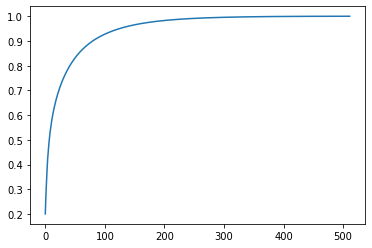

In [26]:
pca = PCA().fit(df.values)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [28]:
pca = PCA(n_components=200)
df = pca.fit_transform(df)

In [30]:
df = pd.DataFrame(data=df, index=dic.keys())

In [31]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
1000,6.451160,-3.551597,2.812647,-7.786051,-1.854129,-0.788550,-3.640428,-1.006964,0.593710,0.390803,...,-0.036982,-0.037476,-0.000544,-0.063931,-0.170253,-0.171792,-0.155856,0.232907,-0.074898,-0.001338
1001,10.679192,-4.654103,0.394651,-6.067107,-0.782128,-2.698834,-2.202642,-0.949290,1.444721,1.441624,...,-0.083016,-0.564499,0.192222,-0.243853,-0.338377,0.053754,-0.425447,-0.464197,0.426968,-0.209356
1002,7.322650,-5.719898,-4.426306,4.446971,-0.268286,2.689194,1.617716,-0.322713,-3.013821,0.333235,...,0.093319,0.079550,0.108641,0.119318,0.128844,0.176620,0.132801,0.253752,0.225191,-0.098656
1003,-15.293322,1.234061,-6.914356,-0.399876,-3.622600,-0.897216,-2.362806,-0.876070,2.302003,1.742938,...,0.228319,0.366406,-0.088751,-0.233484,0.006702,-0.092126,0.240593,-0.050416,0.105371,0.077333
1004,-16.290875,2.544510,-9.038565,0.331856,-5.306731,-1.597454,-1.247256,-0.652486,2.189082,1.610730,...,0.093335,-0.050184,-0.319732,-0.300636,-0.007112,0.070423,0.113208,-0.082244,0.381099,0.004294


In [35]:
df.to_csv(path_or_buf='encoded_image_vectors.csv')